In [1]:
import numpy as np
import pandas as pd
import pylab
import math
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
import seaborn as sns 
from numpy.linalg import inv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# QUESTION 2

In [3]:
# PART 1

In [4]:
x=np.array([[1, 2.1], [2, 4.1], [3, 5.9], [4, 8.2], [5, 9.9]])
y=np.array([2.3, 4.3, 6.3, 7.8, 9.8])

In [5]:
def normal_equation(x, y ,c = None):
    if c is None:
        # for linear regression
        return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    else:
        #for ridge regression
        return np.linalg.inv(x.T.dot(x)+c*np.identity(1)).dot(x.T).dot(y)

In [6]:
x1 = np.append(np.ones(x.shape[0]), x)
x2 = x1.reshape(3,-1).T
coefficient=normal_equation(x2,y)
coefficient


array([-3.3099785 ,  1.94826016,  0.70548844])

In [7]:
x1

array([1. , 1. , 1. , 1. , 1. , 1. , 2.1, 2. , 4.1, 3. , 5.9, 4. , 8.2,
       5. , 9.9])

In [8]:
coefficient[0]

-3.3099785014690415

In [9]:
x2

array([[1. , 1. , 5.9],
       [1. , 2.1, 4. ],
       [1. , 2. , 8.2],
       [1. , 4.1, 5. ],
       [1. , 3. , 9.9]])

In [12]:
Y_pred=x2.dot(coefficient)
RSS_cost=((Y_pred-y).transpose()).dot(Y_pred-y)
print("The RSS cost is given by",RSS_cost)

The RSS cost is given by 0.9843200931687214


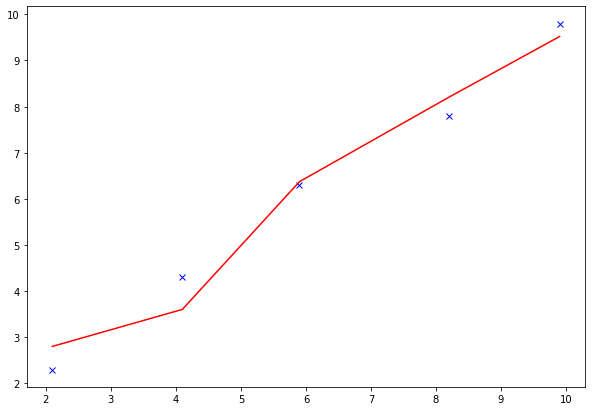

In [15]:
fig,ax = plt.subplots()
ax.plot(x[:,1],y,'x',color='Blue')
plt.plot(x[:,1], Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

In [16]:
#PART 2

In [17]:
x_normal = x-np.mean(x)
x_normal

array([[-3.52, -2.42],
       [-2.52, -0.42],
       [-1.52,  1.38],
       [-0.52,  3.68],
       [ 0.48,  5.38]])

In [18]:
ybar=np.mean(y)
ybar

6.1

In [19]:
x_normal = x-np.mean(x)
Ridge_lambda_1 = normal_equation(x_normal,y,1)

print("Coefficient for lambda=1 : " ,Ridge_lambda_1)

Coefficient for lambda=1 :  [-2.03495573  1.9711764 ]


In [20]:
Ridge_lambda_10 = normal_equation(x_normal,y,10)
print("Coefficient for lambda=10: " ,Ridge_lambda_10)

Coefficient for lambda=10:  [-2.01956909  1.97605488]


In [21]:
rss_1 = (Ridge_lambda_1.T.dot(x_normal.T).dot(x_normal).dot(Ridge_lambda_1))-(2*y.T.dot(x_normal).dot(Ridge_lambda_1))+y.T.dot(y)
rss_10 = (Ridge_lambda_10.T.dot(x_normal.T).dot(x_normal).dot(Ridge_lambda_10))-(2*y.T.dot(x_normal).dot(Ridge_lambda_10))+y.T.dot(y)

print("RSS for lambda 1 :" , rss_1)
print("RSS for lambda 10 :" , rss_10)

RSS for lambda 1 : 0.5372186331986768
RSS for lambda 10 : 0.5473293378640278


In [22]:
# QUESTION 3

In [23]:
# PART 2

In [24]:
x=np.array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4 ])
y=np.array([5.1, 6.4, 6.1, 8.2, 9.5, 8.6, 12, 14.8])
exponential=[]
for i in x:
    exponential.append(math.exp(i))

In [25]:
c=np.vstack([np.ones(len(x)),x,exponential]).T

In [26]:
theta=np.dot(np.linalg.inv(np.dot(c.T,c)),np.dot(c.T,y))
theta

array([ 1.71129241, -1.83495516,  3.76854366])

1.7112924050123297 , -1.8349551616718145 , 3.7685436607837346


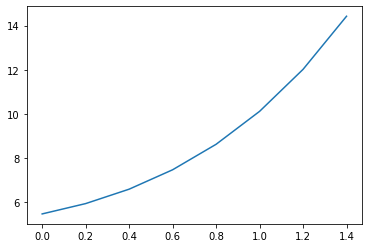

In [27]:
yn = theta[0]+theta[1]*x+theta[2]*np.exp(x)
print(theta[0],',', theta[1],',',theta[2])
plt.plot(x, yn)
plt.show()

In [28]:
#PART 3

In [29]:
cost=0
for i in range(0,8):
    cost+=(y[i]-1.7112924050123297+1.8349551616718145*x[i]-3.7685436607837346*math.exp(x[i]))**2
print("The RSS cost is given ",cost)    

The RSS cost is given  4.330238571373964


In [30]:
# QUESTION 4

In [31]:
#PART 1

In [32]:
data=pd.read_csv("data.csv", error_bad_lines=False) 

In [33]:
x1 = data.x1.values
x2 = data.x2.values
y = data.y.values
x1_x2 = data[['x1','x2']]
x12 = x1_x2.to_numpy() 
x = np.hstack([np.ones((x1_x2.shape[0], 1)),x1_x2])


In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))



def grad_cost(theta,x,y):
    z=x.dot(theta)
    gradcost=(1/len(x))*np.matmul(x.T,sigmoid(z)-y)
    return gradcost


def GradDesc(x,y,theta,alpha,iteration):
    for i in range(iteration):
        theta_new=theta-alpha*grad_cost(theta,x,y)
        theta=theta_new
    return theta_new

theta0=np.zeros(x.shape[1])


theta0=np.zeros(x.shape[1])


In [37]:
alpha=0.02
n_iter=1000
theta=GradDesc(x,y,theta0,alpha,n_iter)

In [38]:
theta

array([0.04617983, 1.37920924, 1.25274956])

In [61]:
x_value=np.array([np.min(x[:,1]),np.max(x[:,1])])
y_value= -(theta[0] + theta[1]*x_value)/theta[2]

In [80]:
x1_vec = np.linspace(data["x1"].min(),data["x1"].max(),2);
x1_vec

array([-3.51,  3.81])

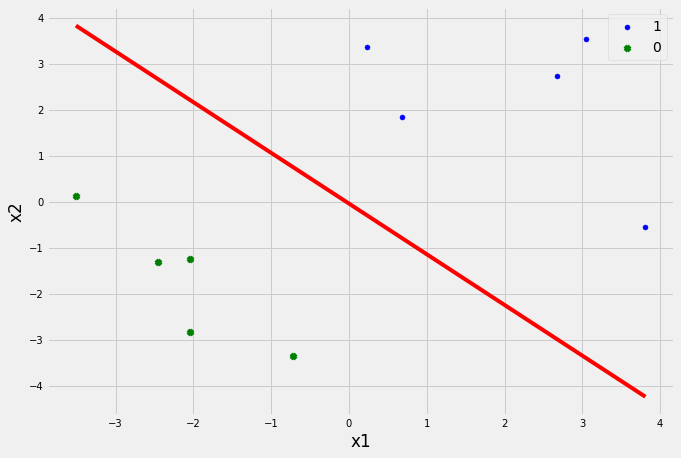

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

trues = data[data.y.values == 1]
falses = data[data.y.values == 0]

ax1.scatter(trues['x1'],trues['x2'], s=25, c='b', marker="o", label='1')
ax1.scatter(falses['x1'],falses['x2'], s=25, c='g', marker="x", label='0')
plt.plot(x1_vec,(-x1_vec*1.37920924-0.04617983)/1.25274956, color="red"); #  Plot decision boundary
plt.legend(loc='upper right');
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
fig.set_size_inches(10, 7) 
plt.show() 

In [47]:
#PART3

In [48]:
data['X1square'] = data['x1']**2
data['X2square'] = data['x2']**2
data['X1X2'] = data['x1']*data['x2']

In [49]:
X_2 = data[['x1','x2','X1square','X2square','X1X2']]
X = np.hstack([np.ones((x1_x2.shape[0], 1)), X_2.values]) 
X = data[['x1','x2','X1square','X2square','X1X2']].values 

In [57]:
theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0
theta4 = 0
theta5 = 0
L = 0.02
epochs = 1000
# Method for predictions
def sigmoid(x, theta0, theta1, theta2, theta3, theta4,theta5):
    return np.array([1 / (1 + math.exp(-1*theta0 + -1*theta1*x[0] + -1*theta2*x[1] + -1*theta2*x[2]+ -1*theta2*x[3] + -1*theta2*x[4])) for x in X])

In [58]:
 for epoch in range(epochs):
    y_pred = sigmoid(x, theta0, theta1, theta2, theta3, theta4,theta5)
    D_theta0 = -2 * sum((y - y_pred) * y_pred * (1 - y_pred)) 
    D_theta1 = -2 * sum(X[:,0] * (y - y_pred) * y_pred * (1 - y_pred))
    D_theta2 = -2 * sum(X[:,1] * (y - y_pred) * y_pred * (1 - y_pred)) 
    D_theta3 = -2 * sum(X[:,2] * (y - y_pred) * y_pred * (1 - y_pred)) 
    D_theta4 = -2 * sum(X[:,3] * (y - y_pred) * y_pred * (1 - y_pred)) 
    D_theta5 = -2 * sum(X[:,4] * (y - y_pred) * y_pred * (1 - y_pred)) 
    theta0 = theta0 - L * D_theta0
    theta1 = theta1 - L * D_theta1
    theta2 = theta2 - L * D_theta2
    theta3 = theta3 - L * D_theta3
    theta4 = theta4 - L * D_theta4
    theta5 = theta5 - L * D_theta5

In [59]:
theta_final=print(theta0,theta1,theta2,theta3,theta5,theta5)  

-1.4617992442433667 3.3806901556004645 1.8853654774642563 -7.573160964393407 -3.479178871312982 -3.479178871312982


mean1 =  [[-0.3]
 [-1.2]]
mean2 =  [[1.]
 [2.]]


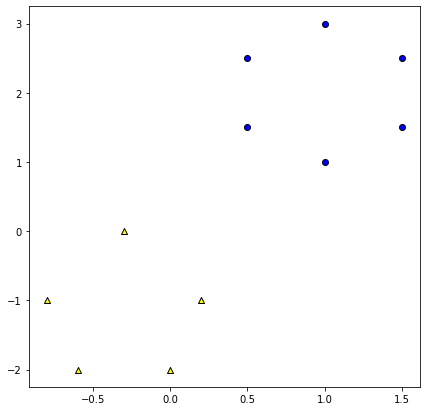

In [60]:



label1 = np.array([[-0.6,  0. ,  0.2, -0.8, -0.3],[-2. , -2. , -1. , -1. ,  0.]])
label2 = np.array([[0.5,  1. ,  1.5,  1.5,  1. ,  0.5],[ 2.5,  1. ,  1.5,  2.5,  3. ,  1.5]])

#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

ax0.scatter(label1[0],label1[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(label2[0],label2[1],marker='o',c='blue',edgecolor='black')

# Calculating the mean vectors
mean_1 = np.mean(label1,axis=1).reshape(2,1)
print('mean1 = ',mean_1)
mean_2 = np.mean(label2,axis=1).reshape(2,1)
print('mean2 = ',mean_2)
sca_1 = np.dot((label1-mean_1),(label1-mean_1).T)
sca_2 = np.dot((label2-mean_2),(label2-mean_2).T)



In [ ]:
#QUESTION 5

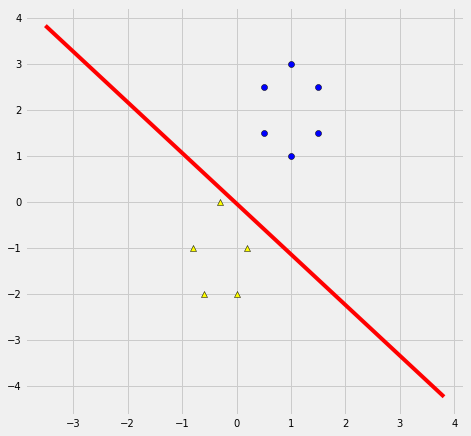

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('fivethirtyeight')
np.random.seed(seed=42)

#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

ax0.scatter(label1[0],label1[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(label2[0],label2[1],marker='o',c='blue',edgecolor='black')
plt.plot(x_value,y_value,"r")
#plt.plot(plot_x, plot_y, label = "Decision_Boundary")




In [66]:
mu0 = np.mean(label1,axis=1).reshape(2,1)
print('mu0 = ',mu0)
mu1 = np.mean(label2,axis=1).reshape(2,1)
print('mu1 = ',mu1)

np.matrix(mu0).shape



mu0 =  [[-0.3]
 [-1.2]]
mu1 =  [[1.]
 [2.]]


(2, 1)

In [67]:
m = len(label1.T) + len(label2.T)

label1_mu0 = np.dot((label1-mu0),(label1-mu0).T)
label2_mu1 = np.dot((label2-mu1),(label2-mu1).T)


#Calculating Covariance Matrix
sigma = (label1_mu0 + label2_mu1)/(m-2)
sigma


array([[0.18666667, 0.        ],
       [0.        , 0.64444444]])

In [68]:

rectangles = np.array([[-0.6,  0. ,  0.2, -0.8, -0.3],[-2 , -2 , -1 , -1 ,  0]])
circles = np.array([[0.5,  1. ,  1.5,  1.5,  1. ,  0.5],[2.5,  1 ,  1.5,  2.5,  3 , 1.5]])

combined=np.array([[-0.6,  0. ,  0.2, -0.8, -0.3,  0.5,  1. ,  1.5,  1.5,  1. ,  
0.5],[-2. , -2. , -1. , -1. ,  0. ,  2.5,  1. ,  1.5,  2.5,  3. ,  
1.5]])

n_r = len(rectangles.T)
n_c = len(circles.T)


n_t = n_r + n_c

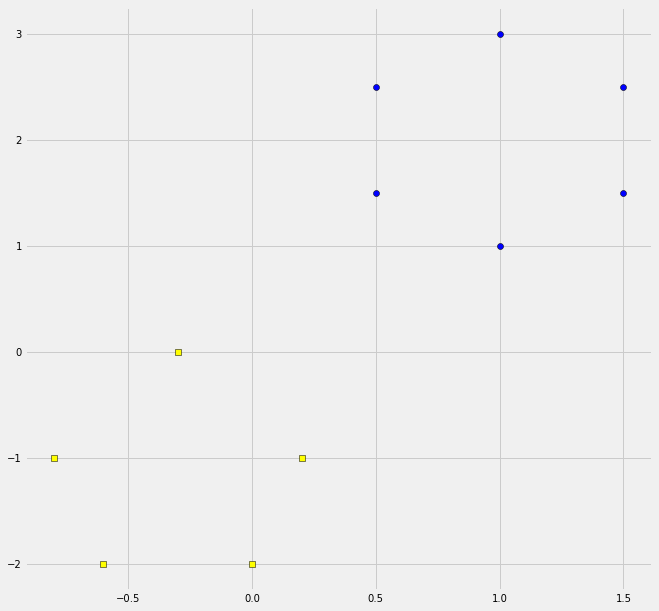

In [70]:

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')



In [71]:
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_circles = np.mean(circles,axis=1).reshape(2,1)

mean_combined = np.mean(combined,axis=1).reshape(2,1)

print('Mean_1 (Label 1):')
print(mean_rectangles)
print('Mean_2 (Label 2):')
print(mean_circles)
print(mean_combined)




Mean_1 (Label 1):
[[-0.3]
 [-1.2]]
Mean_2 (Label 2):
[[1.]
 [2.]]
[[0.40909091]
 [0.54545455]]


In [83]:
# Calculate the covariance matrix here
covariance_r = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)
# print(np.var(rectangles[0],ddof=0))

covariance_c = np.dot((circles-mean_circles),(circles-mean_circles).T)
# print(np.var(circles[0],ddof=0))

sigma = (1/(n_t - 2))*(covariance_r + covariance_c)

print(covariance_r)
print(covariance_c)
print('sigma:',sigma)


phi_r = n_r/n_t
phi_c = n_c/n_t

print('phi_1 = ' + str(phi_r),',','phi_2 = ' + str(phi_c))



[[0.68 0.  ]
 [0.   2.8 ]]
[[1. 0.]
 [0. 3.]]
sigma: [[0.18666667 0.        ]
 [0.         0.64444444]]
phi_1 = 0.45454545454545453 , phi_2 = 0.5454545454545454


In [ ]:
#PART 1(2)

In [77]:
s_inv = np.linalg.inv(sigma)

for1A = s_inv.dot(mean_rectangles)
for1B = -(1/2)*(mean_rectangles.T).dot(s_inv).dot(mean_rectangles) + np.log(phi_r)

for2A = s_inv.dot(mean_circles)
for2B = -(1/2)*(mean_circles.T).dot(s_inv).dot(mean_circles) + np.log(phi_c)

forA = for1A - for2A
forB = for2B - for1B

print('(x1 x2)', forA.T)
print('C', forB)




(x1 x2) [[-6.96428571 -4.96551724]]
C [[-4.24138534]]
